<a href="https://colab.research.google.com/github/TuanPham2024/Text_Classification_nltk_sklearn_bayes_naive/blob/main/Project_Mod02_Week05_Text_Classification_nltk_sklearn_bayes_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Chương trình phân loại tin nhắn rác hay không với Naive Bayes***

**1. Tải bộ dữ liệu:**

In [25]:
# Tải bộ dữ liệu
# https://drive.google.com/file/d/1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R/view?usp=sharing
!gdown --id 1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R
To: /content/2cls_spam_text_cls.csv
100% 486k/486k [00:00<00:00, 59.4MB/s]


**2. Import các thư viện cần thiết:**

In [26]:
# Import các thư viện
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**3. Đọc dữ liệu:**

In [27]:
# Đọc dữ liệu:
DATASET_PATH ='/content/2cls_spam_text_cls.csv'
df = pd.read_csv(DATASET_PATH)
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()
# In 5 dòng đầu tiên của messages (trong trường hợp có ít hơn 5 dòng, in tất cả)
print('type(messages) :   ', type(messages), '\t type(messages[0]) = ',type(messages[0]),'\n',messages[:5])

type(messages) :    <class 'list'> 	 type(messages[0]) =  <class 'str'> 
 ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


**4. Tiền xử lý dữ liệu:**

4.1/ *Tiền xử lý dữ liệu đặc trưng:*

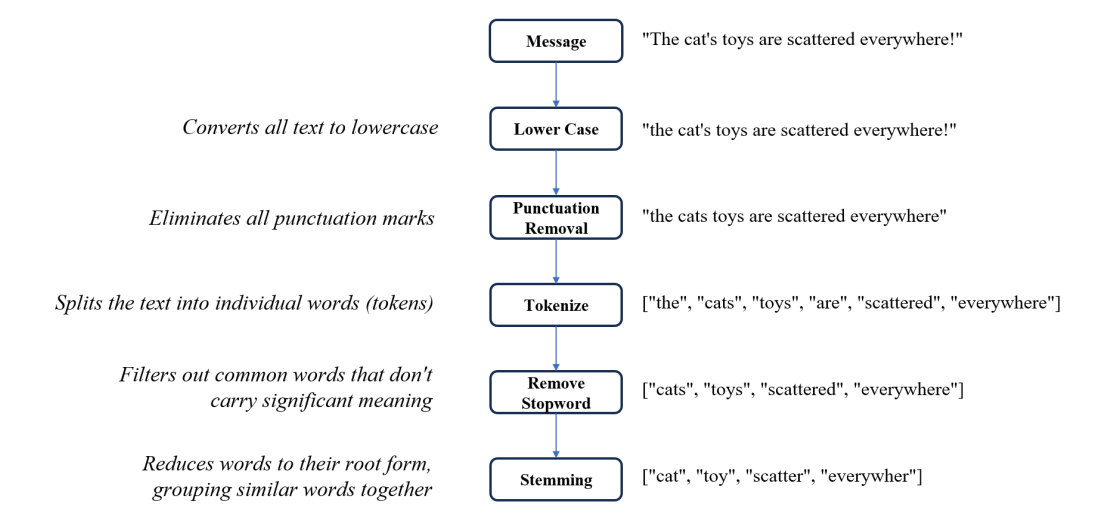

In [28]:
def lowercase(text):
    return text.lower()

# Hàm xóa dấu câu
def punctuation_removal(text):
    translator = str.maketrans ('', '', string.punctuation)
    return text.translate(translator)

# Hàm xóa số
def remove_digits(text):
    return ''.join(word for word in text if not word.isdigit())

def tokenize(text) -> list:
    """  Hàm tách từ """
    return nltk.word_tokenize(text)

def remove_stopwords(tokens: list)-> list:
    """ Hàm xóa stopwords"""
    stop_words = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stop_words]


def stemming(tokens: list) -> list:
    """ Hàm rút gọn từ
    # VD : tokens = ['running', 'jumps', 'faster'] --(stemming)--> ['run', 'jump', 'faster']
    """
    stemmer = nltk.PorterStemmer()  # thư viện NLTK để thực hiện quá trình stemming (tìm gốc từ)

    return [stemmer.stem(token) for token in tokens]

In [29]:
# 4.1/ Tiền xử lý dữ liệu đặc trưng:
def preprocess_text(text : list) -> list:
    """     Hàm tiền xử lý văn bản thành list các từ gốc giản đơn hơn.    """
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    return tokens

# 'messages' input là list đoạn văn -> messages sau preprocess_text list text đã xử lí
messages = [preprocess_text(message) for message in messages]
# messages = ["This is a test message!", "NLTK is great for text processing.", "123 Easy as 1-2-3!", "Hello, World!"]

# Kiểu dữ liệu của `messages`
print("messages[0]: ", (messages[0]))  # Sẽ in <class 'list'> vì mỗi phần tử trong `messages` cũng là một danh sách

# In 5 dòng đầu tiên của messages (trong trường hợp có ít hơn 5 dòng, in tất cả)
print('type(messages) :   ', type(messages), '\t type(messages[0]) = ',type(messages[0]),'\n',messages[:5])

# Kích thước các chiều của `messages`
print("Number of messages:", len(messages))
print("Tokens in first message:", len(messages[0]))

messages[0]:  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
type(messages) :    <class 'list'> 	 type(messages[0]) =  <class 'list'> 
 [['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['ok', 'lar', 'joke', 'wif', 'u', 'oni'], ['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc', 'appli', '08452810075over18'], ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'], ['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']]
Number of messages: 5572
Tokens in first message: 16


**4.2/  Tạo một bộ từ điển (Dictionary):**

tạo ra những đặc trưng đại diện cho thông tin (là các từ) của các Message chứa tất các từ hoặc ký tự có xuất hiện trong toàn bộ Messages

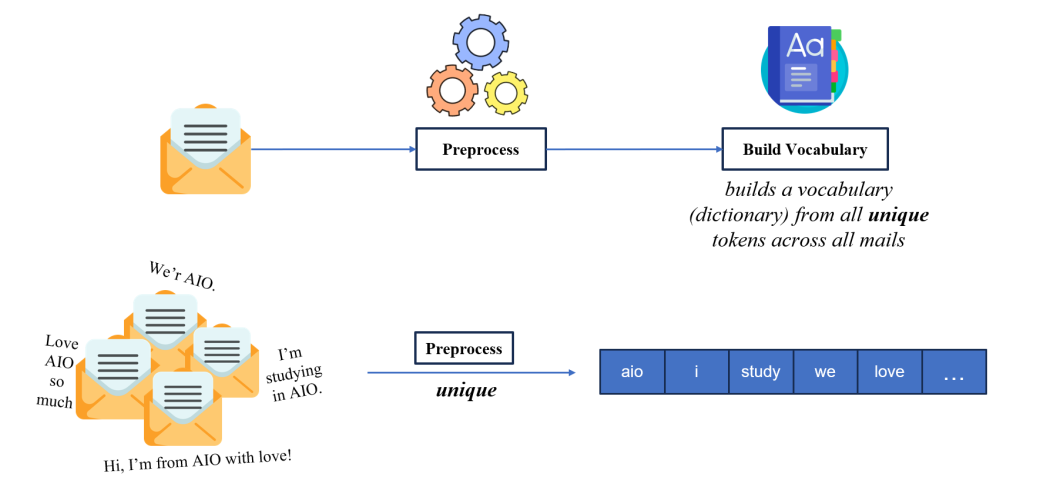

In [30]:
# 4.2/ Tạo ra bộ từ điển
def create_dictionary(messages : list) -> list:
    """     Tạo ra bộ từ điển dạng list    """
    dictionary = []
    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)

    return dictionary

def create_dictionary_dict(messages) -> dict:
    """     Tạo ra bộ từ điển dạng dict    """
    dictionary = []
    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)
    dict_with_index = {index: item for index, item in enumerate(dictionary)}
    return dict_with_index

dictionary = create_dictionary(messages)
print(dictionary[:5])

['go', 'jurong', 'point', 'crazi', 'avail']


**4.3/ Tạo ra những đặc trưng đại diện cho thông tin (là các từ) dựa vào tần xuất xuất hiện các từ**

Tạo ra những đặc trưng đại diện cho thông tin (là các từ) dựa vào tần suất xuất hiện của từ vector đại diện sẽ có kích thước bằng với số lượng từ có trong Dictionary.

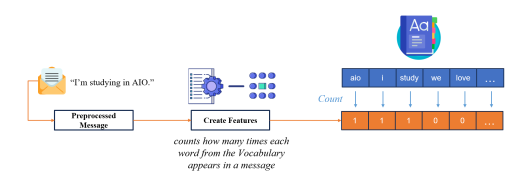

In [31]:
# 4.3/
def create_features(tokens, dictionary) -> dict:
    """     Tạo ra những đặc trưng đại diện cho thông tin (là các từ) dựa vào tần suất xuất hiện của từ    """
    features = np.zeros(len(dictionary))
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features


X = np.array([create_features(tokens, dictionary) for tokens in  messages])
print(X[:5], '\nVector X[0] = ', X[0],' ---> shape = ' , X[0].shape)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vector X[0] =  [1. 1. 1. ... 0. 0. 0.]  ---> shape =  (8166,)


**4.4/ Tiền xử lý dữ liệu nhãn:**

Đối với nhãn của bài toán này, chúng ta sẽ xử lý đơn giản bằng cách chuyển 2 nhãn ham và spam thành các con số 0 và 1

In [32]:
#  3/ Tiền xử lý dữ liệu nhãn:
le = LabelEncoder() #from sklearn.preprocessing import LabelEncoder
y =  le.fit_transform(labels) #LabelEncoder.fit_transform(labels)
print (f'Classes : {le.classes_}')
print (f'Encoded labels : {y}')

Classes : ['ham' 'spam']
Encoded labels : [0 0 1 ... 0 0 0]


**5/ Chia bộ dữ liệu train/val/test:**

Khi tiến hành huấn luyệnh một mô hình machine
learning

In [33]:
# chia bộ dữ liệu thành 3 phần: Train, Validation và
# Test theo tỉ lệ lần lượt là 7/2/1 (trên tỉ lệ 100% của bộ dữ liệu gốc)

VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 0

# Input mô hình:
#  --> X là các vectors<chiều dài dictinary> = features<dictionary[key(type int) : value(tần số xuất hiện)]>
#  --> y là LabelEncoder.fit_transform(labels) -> các categorys nhãn của mô hình bayes
X_train , X_val , y_train , y_val = train_test_split(X, y,
                                                      test_size = VAL_SIZE ,
                                                      shuffle =True ,
                                                      random_state = SEED)

X_train , X_test , y_train , y_test = train_test_split(X_train , y_train ,
                                                        test_size = TEST_SIZE ,
                                                         shuffle =True ,
                                                         random_state = SEED)

**6/ Huấn luyện mô hình:**

truyền chúng vào mô hình Gaussian Naive Bayes và tiến hành huấn luyện bằng các hàm trong thư viện sklearn.


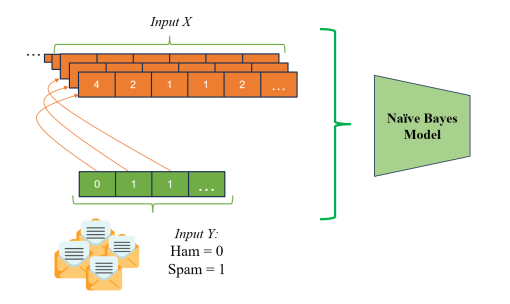

In [11]:
model_GaussianNB = GaussianNB() # from sklearn.naive_bayes import GaussianNB
print ('Start training ...')
model_GaussianNB = model_GaussianNB.fit(X_train , y_train) # Huấn luyện mô hình dựa trên X_train, và y_train
print('Training completed!')

Start training ...
Training completed!


**7. Đánh giá mô hình:**

Sau khi huấn luyện, chúng ta đến phần đánh giá hiệu suất của mô hình. Bắt đầu với việc cho mô hình đã huấn luyện dự đoán trên tập Validation và Test. Sau đó, sử dụng độ đo Accuracy Score để đánh giá mô hình.

In [13]:
y_val_pred   = model_GaussianNB.predict(X_val)  #Sử dụng mô hình để dự đoán trên tập chừa lại để đánh giá
y_test_pred  = model_GaussianNB.predict(X_test) #Sử dụng mô hình để dự đoán trên tập đánh giá lại
val_accuracy = accuracy_score(y_val , y_val_pred)
test_accuracy = accuracy_score(y_test , y_test_pred)
print (f'Val accuracy : { val_accuracy }')
print (f'Test accuracy : { test_accuracy }')

# >> Val accuracy : 0.8816143497757848
# >> Test accuracy : 0.8602150537634409
# Lưu ý: nếu chênh lệch lớn giữa Val accuracy và Test accuracy có thể là dấu hiệu của overfitting,
#        nghĩa là mô hình học thuộc quá mức từ tập huấn luyện và không tổng quát hóa tốt với dữ liệu mới

Val accuracy : 0.8816143497757848
Test accuracy : 0.8602150537634409


**8. Thực hiện dự đoán:**

Cuối cùng, để sử dụng mô hình cho các Message mới, chúng ta sẽ phải thực lại các công đoạn Tiền xử lý, tạo đặc trưng cho Message mới này và truyền vào
mô hình Naive Bayes.

Lúc này, mô hình sẽ trả về giá trị 0 hoặc 1, do đó, cần gọi hàm inverse_transform() để chuyển đổi lại về nhãn ban đầu là Ham hoặc Spam.

In [23]:
def predict (text, model_GaussianNB , dictionary):
    processed_text = preprocess_text(text)
    features = create_features(text , dictionary)
    features = np.array(features).reshape(1, -1)
    prediction = model_GaussianNB.predict(features)
    prediction_cls = le.inverse_transform(prediction)[0]
    return prediction_cls

test_input = 'I am actually thinking a way of doing something useful'
prediction_cls = predict(test_input, model_GaussianNB , dictionary)
print (f'Prediction : { prediction_cls }')

Prediction : ham


----------------------------------------- **CODE TEST VUI**   -------------------------------------

In [34]:
def remove_stopwords( tokens ):
    stop_words = nltk.corpus.stopwords.words('english')
    return [ token for token in tokens if token not in stop_words ]

input_text = ["Pho ", "is", "a", "popular", "Vietnamese", "noodle", "soup"]
result = remove_stopwords(input_text )
print(result)

['Pho ', 'popular', 'Vietnamese', 'noodle', 'soup']


In [ ]:
def create_features(tokens , dictionary):
    features = np.zeros(len ( dictionary ))
    for token in tokens :
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features